<a href="https://colab.research.google.com/github/xKDR/Julia-Workshop/blob/main/Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [1]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.10.4" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Unrecognized magic `%%shell`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [2]:
versioninfo()

Julia Version 1.10.4
Commit 48d4fd48430 (2024-06-04 10:41 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


# Syntax

## Variable declaration

In [3]:
a = 10
b = 20

20

## Arithematic operations

In [4]:
sum = a + b

30

In [5]:
product = a * b

200

## Conditional statement

In [6]:
age = 25

if age >= 18
    println("You’re an adult.")
else
    println("You’re a minor.")
end

You’re an adult.


## Define a function

In [7]:
function greet(name)
    println("Hello ", name)
end

greet (generic function with 1 method)

## Call the function

In [8]:
greet("Julia")

Hello Julia


## Array creation


In [9]:
numbers = [1, 2, 3, 4, 5]

5-element Vector{Int64}:
 1
 2
 3
 4
 5

## Loop through elements

In [10]:
for num in numbers
    println(num)
end

1
2
3
4
5


## List comprehension


In [11]:
squares = [i^2 for i in 1:5]
squares = [i^2 for i in numbers]

5-element Vector{Int64}:
  1
  4
  9
 16
 25

## Dictionary creation


In [12]:
person = Dict(
"name" => "Alice",
"age" => 30,
"city" => "New York")

Dict{String, Any} with 3 entries:
  "name" => "Alice"
  "city" => "New York"
  "age"  => 30

## Access values by key


In [13]:
person["name"])

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file:///content/In[13]#1:15\[90mIn[13]:1:15[0;0m]8;;\
person["name"][48;2;120;70;70m)[0;0m
[90m#             ╙ ── [0;0m[91mextra tokens after end of expression[0;0m

## Create a matrix

In [14]:
A = [1 2 3; 4 5 6; 7 8 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

## Basic indexing


In [15]:
element = A[2, 3]
second_row = A[2, :]
third_column = A[:, 3]
submatrix = A[1:2, 2:3]

2×2 Matrix{Int64}:
 2  3
 5  6

## Broadcasting example

In [16]:
A = [1 2 3; 4 5 6; 7 8 9]
B = [2 2 2; 2 2 2; 2 2 2]
C = A .+ B

f(x) = x^2

f.(A)

3×3 Matrix{Int64}:
  1   4   9
 16  25  36
 49  64  81

# Multiple dispatch

Define methods for different types

In [17]:
function process(x::Number,
y::Number)
return x + y
end

function process(x::String,
y::String)
return x * y
end

function process(x::Array,
y::Array)
return x .+ y
end

process (generic function with 3 methods)

Julia automatically selects correct method

In [18]:
process(1, 2)
# 3
process("a", "b")
# "ab"
process([1,2], [3,4]) # [4,6]

2-element Vector{Int64}:
 4
 6

## Multiple Dispatch in action

Same `plot()` function, different types

In [25]:
using Pkg

Pkg.add(["Plots", "Rasters", "RasterDataSources", "ArchGDAL"])

   Resolving package versions...
   Installed GeoInterfaceMakie ─── v0.1.8
   Installed ZipFile ───────────── v0.10.1
   Installed Hwloc_jll ─────────── v2.11.2+1
   Installed boost_jll ─────────── v1.76.0+1
   Installed Giflib_jll ────────── v5.2.2+0
   Installed EarCut_jll ────────── v2.2.4+0
   Installed GDAL_jll ──────────── v301.1000.0+0
   Installed MicrosoftMPI_jll ──── v10.1.4+3
   Installed Qhull_jll ─────────── v8.0.1003+0
   Installed snappy_jll ────────── v1.1.10+0
   Installed Thrift_jll ────────── v0.16.0+0
   Installed MPIPreferences ────── v0.1.11
   Installed Lz4_jll ───────────── v1.10.0+1
   Installed HDF5_jll ──────────── v1.14.3+3
   Installed ICU_jll ───────────── v69.1.0+0
   Installed libgeotiff_jll ────── v100.702.300+0
   Installed RasterDataSources ─── v0.7.0
   Installed MappedArrays ──────── v0.4.2
   Installed PaddedViews ───────── v0.5.12
   Installed MPICH_jll ─────────── v4.2.3+0
   Installed NetCDF_jll ────────── v400.902.211+1
   Installed libzip_jll 

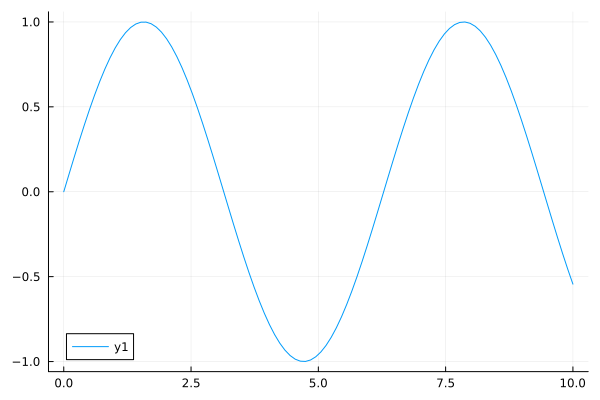

In [23]:
using Plots
x = range(0, 10, length=100)
y = sin.(x)
plot(x, y)

[ Info: Starting download for https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_10m_bio.zip
┌ Info: Downloading
│   source = "https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_10m_bio.zip"
│   dest = "/content/WorldClim/BioClim/zips/wc2.1_10m_bio.zip"
│   progress = 0.2993
│   time_taken = "1.0 s"
│   time_remaining = "2.34 s"
│   average_speed = "14.222 MiB/s"
│   downloaded = "14.236 MiB"
│   remaining = "33.323 MiB"
└   total = "47.559 MiB"
┌ Info: Downloading
│   source = "https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_10m_bio.zip"
│   dest = "/content/WorldClim/BioClim/zips/wc2.1_10m_bio.zip"
│   progress = 0.9065
│   time_taken = "2.0 s"
│   time_remaining = "0.21 s"
│   average_speed = "21.535 MiB/s"
│   downloaded = "43.114 MiB"
│   remaining = "4.446 MiB"
└   total = "47.559 MiB"
┌ Info: Downloading
│   source = "https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_10m_bio.zip"
│   dest = "/content/WorldClim/BioClim/zips/wc2.1_10m_bi

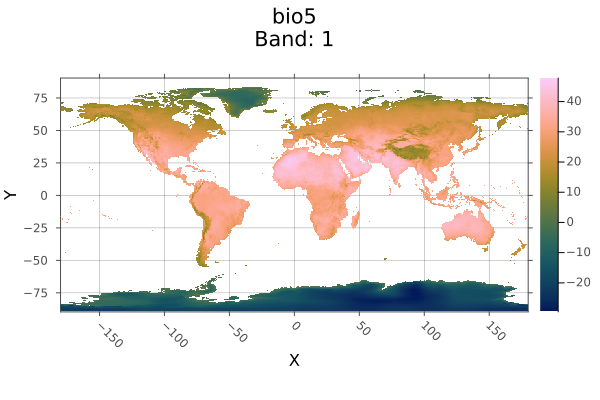

In [29]:
using Rasters, RasterDataSources, ArchGDAL, Plots

ENV["RASTERDATASOURCES_PATH"] = "/content/"

A = Raster(WorldClim{BioClim},
5)
plot(A)

In [30]:
f(x) = 5x^2 + 3x + 8

@code_llvm f(10)

;  @ In[30]:1 within `f`
define i64 @julia_f_4930(i64 signext %0) #0 {
top:
; ┌ @ int.jl:88 within `*`
   %1 = mul i64 %0, 5
   %reass.add = add i64 %1, 3
   %reass.mul = mul i64 %reass.add, %0
; └
; ┌ @ operators.jl:587 within `+` @ int.jl:87
   %2 = add i64 %reass.mul, 8
   ret i64 %2
; └
}


In [31]:
@code_native f(10)

	.text
	.file	"f"
	.globl	julia_f_4946                    # -- Begin function julia_f_4946
	.p2align	4, 0x90
	.type	julia_f_4946,@function
julia_f_4946:                           # @julia_f_4946
; ┌ @ In[30]:1 within `f`
# %bb.0:                                # %top
	push	rbp
	mov	rbp, rsp
	lea	rax, [rdi + 4*rdi]
	add	rax, 3
	imul	rax, rdi
; │┌ @ operators.jl:587 within `+` @ int.jl:87
	add	rax, 8
	pop	rbp
	ret
.Lfunc_end0:
	.size	julia_f_4946, .Lfunc_end0-julia_f_4946
; └└
                                        # -- End function
	.section	".note.GNU-stack","",@progbits


In [32]:
Pkg.add("Zygote")
using Zygote

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [33]:
f(x) = 5x^2 + 3x
df(x) = Zygote.gradient(f, x)[1]

@code_llvm df(10)

;  @ In[33]:2 within `df`
define double @julia_df_4950(i64 signext %0) #0 {
top:
; ┌ @ /root/.julia/packages/Zygote/nyzjS/src/compiler/interface.jl:148 within `gradient`
; │┌ @ /root/.julia/packages/Zygote/nyzjS/src/compiler/interface.jl:91 within `#78`
; ││┌ @ In[33]:1 within `f`
; │││┌ @ /root/.julia/packages/Zygote/nyzjS/src/compiler/chainrules.jl:212 within `ZBack`
; ││││┌ @ /root/.julia/packages/Zygote/nyzjS/src/lib/number.jl:12 within `literal_pow_pullback`
; │││││┌ @ int.jl:88 within `*`
        %1 = shl i64 %0, 1
; ││││││ @ promotion.jl:423 within `*`
; ││││││┌ @ promotion.jl:393 within `promote`
; │││││││┌ @ promotion.jl:370 within `_promote`
; ││││││││┌ @ number.jl:7 within `convert`
; │││││││││┌ @ float.jl:159 within `Float64`
            %2 = sitofp i64 %1 to double
; ││││││└└└└
; ││││││ @ promotion.jl:423 within `*` @ float.jl:411
        %3 = fmul double %2, 5.000000e+00
; ││└└└└
; ││┌ @ /root/.julia/packages/Zygote/nyzjS/src/lib/lib.jl:17 within `accum`
; │││┌ @ float.jl